In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyspedas
import pytplot
import plasma_params as pp
import compressional_B as cb
import calc_RI as cr
import ULF_duct_plot_detail as udp
import calc_integral_chorus as cic
import ULF_duct_plot_ver2 as udp2
import calc_stokes as cs
import calc_refractive_index as cri
import get_density as gd

In [22]:
def calc_n1_fast(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 30*np.pi/180
    path = './erg_data/satellite/erg/pwe/hfa/l3/1min/2017/03/erg_pwe_hfa_l3_1min_20170327_v03_07.cdf'
    pytplot.cdf_to_tplot(path)
    pyspedas.tinterpol('ne_mgf', 'delta_z', newname='n0_intpl')
    gb = gamma*beta
    a = gb
    A = 1-a/2+((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*pytplot.data_quants['n0_intpl']*1e6*B1/B0/A
    N = pytplot.data_quants['n0_intpl']*1e6+n1
    B = B0+B1
    mu = np.zeros(len(B['time']))
    for i in range(len(B['time'])):
        mu[i] = cr.calc_RI(N[i], B[i], f)
    return mu

In [23]:
path = './erg_data/satellite/erg/pwe/hfa/l3/1min/2017/03/erg_pwe_hfa_l3_1min_20170327_v03_07.cdf'
pytplot.cdf_to_tplot(path)


['Epoch', 'Fuhr', 'ne_mgf', 'quality_flag']

In [24]:
beta = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1.0]
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']
'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
gamma = 5/3
f = 400


for i in range(len(beta)):
    mu = calc_n1_fast(gamma, beta[i], tr, f)
    pytplot.store_data('mu_'+str(beta[i]), data={'x':pytplot.data_quants['B0']['time'], 'y':mu})



pytplot.store_data('mu_all', data = ['mu_'+str(beta[i]) for i in range(len(beta))])
pytplot.options('mu_all', opt_dict={'ytitle': 'refractive index','legend_names': [str(beta[i]) for i in range(len(beta))], 'color': ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'r', 'g']})


12-Jul-23 18:07:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:07:44: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:07:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:07:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

12-Jul-23 18:07:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:07:45: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:07:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:07:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:07:56: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:07:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:08:15: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:08:15: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:08:15: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:08:15: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:08:15: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:08:27: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:08:27: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:08:46: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:09:11: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:09:11: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:09:11: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:09:12: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:09:12: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:09:12: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:09:23: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:09:23: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:09:23: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:09:23: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:09:23: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:09:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:09:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:09:42: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:10:07: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:10:07: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:10:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:10:08: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:10:19: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:10:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:10:38: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:11:03: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:11:03: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:11:03: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:11:04: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:11:04: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:11:04: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:11:16: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:11:16: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:11:34: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:12:00: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:12:00: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:12:00: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_roa

12-Jul-23 18:12:12: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:12:12: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:12:30: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:12:56: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:12:56: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:12:56: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:12:56: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:12:56: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:12:56: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:13:08: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:13:08: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:13:26: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:13:51: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:13:52: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:13:52: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:13:52: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:13:52: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:14:04: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:14:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:14:22: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:14:47: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:14:47: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:14:47: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:14:48: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:14:48: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:14:48: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:14:59: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:14:59: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:15:18: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:15:43: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:15:43: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:15:43: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:15:43: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:15:43: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:15:55: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:15:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:16:14: tinterpol (linear) was applied to: n0_intpl
12-Jul-23 18:16:39: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:16:40: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:16:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise c

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:16:41: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:16:41: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:16:41: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:16:52: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:16:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:17:11: tinterpol (linear) was applied to: n0_intpl


12-Jul-23 18:17:36: Incorrect number of line colors specified; expected: 1; got: 9


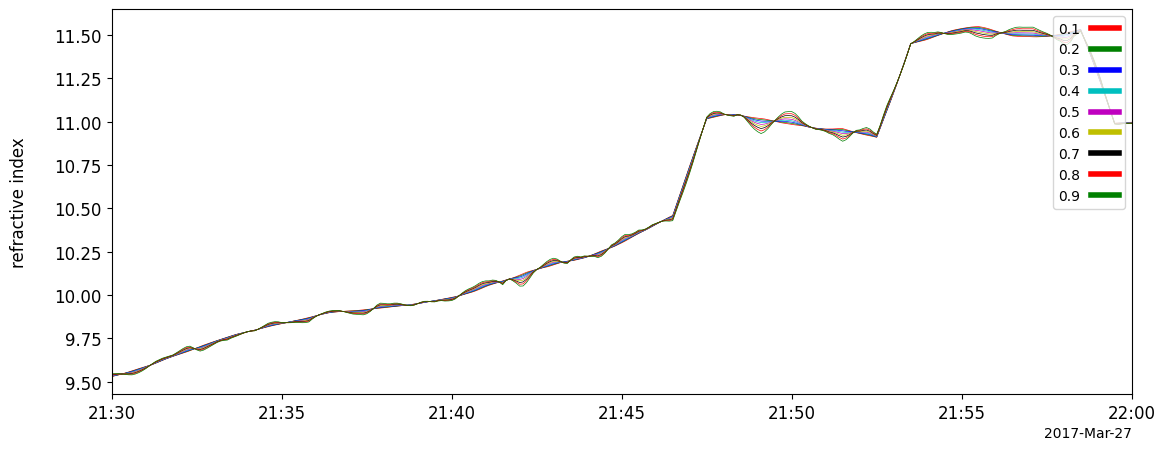

In [25]:
pytplot.xlim(tr[0], tr[1])
pytplot.tplot(['mu_all'])

In [2]:
def calc_n1_fast1(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 30*np.pi/180
    n0 = 2*1e6
    gb = gamma*beta
    a = gb
    A = 1-a/2+((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*n0*B1/B0/A
    N = n0+n1
    B = B0+B1
    mu = np.zeros(len(B['time']))
    for i in range(len(B['time'])):
        mu[i] = cr.calc_RI(N[i], B[i], f)
    return mu

In [3]:
beta = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1.0]
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']
'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
gamma = 5/3
f = 400


for i in range(len(beta)):
    mu = calc_n1_fast1(gamma, beta[i], tr, f)
    pytplot.store_data('mu_fast_'+str(beta[i]), data={'x':pytplot.data_quants['B0']['time'], 'y':mu})



pytplot.store_data('mu_fast_all', data = ['mu_fast_'+str(beta[i]) for i in range(len(beta))])
pytplot.options('mu_fast_all', opt_dict={'ytitle': 'refractive index','legend_names': [str(beta[i]) for i in range(len(beta))], 'color': ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'r', 'g']})


12-Jul-23 18:47:40: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:47:40: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:47:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:47:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

12-Jul-23 18:47:40: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:47:41: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:47:41: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:47:41: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:47:52: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:47:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:48:11: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:48:11: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:48:11: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:48:11: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:48:23: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:48:23: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:49:06: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:49:06: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:49:06: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:49:07: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:49:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:49:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:49:18: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:49:18: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:50:01: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:50:01: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:50:01: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:50:02: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:50:13: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:50:13: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:50:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:50:57: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:50:57: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:50:58: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:50:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:50:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:51:09: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:51:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:51:54: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:51:54: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:51:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:51:54: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:52:05: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:52:05: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:52:49: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:52:49: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:52:49: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:52:50: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:52:50: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:52:50: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:53:01: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:53:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:53:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:53:45: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:53:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:53:45: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:53:56: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:53:56: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:54:40: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:54:40: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:54:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:54:40: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
12-Jul-23 18:54:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:54:40: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:54:52: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:54:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:55:35: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:55:36: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:55:36: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:55:36: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:55:48: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:55:48: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
12-Jul-23 18:56:31: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
12-Jul-23 18:56:33: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
12-Jul-23 18:56:33: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:56:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

12-Jul-23 18:56:34: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


12-Jul-23 18:56:45: tinterpol (linear) was applied to: cos_th_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: sin_th_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: cos_ph_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: sin_ph_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
12-Jul-23 18:56:45: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


12-Jul-23 18:57:28: Incorrect number of line colors specified; expected: 1; got: 9


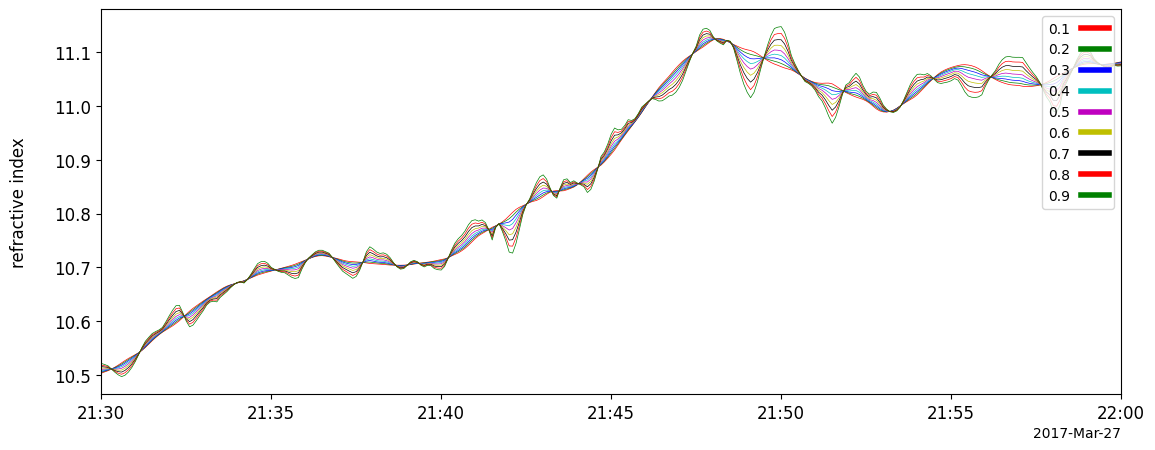

In [4]:
pytplot.xlim(tr[0], tr[1])
pytplot.tplot(['mu_fast_all'])